In [47]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np

In [29]:
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

In [46]:
len(X_train), len(X_test)

(60000, 10000)

In [31]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

5

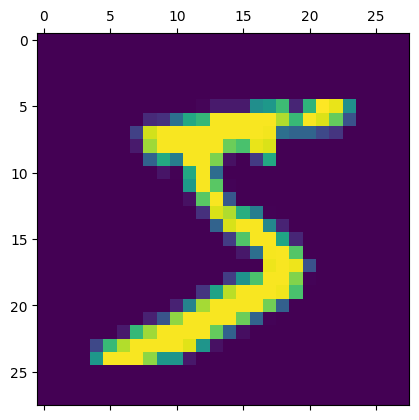

In [32]:
plt.matshow(X_train[0])
y_train[0]

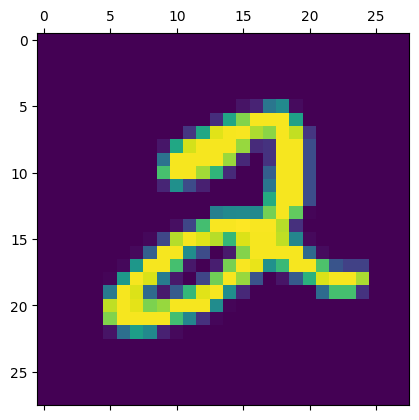

In [33]:
plt.matshow(X_train[5])

In [34]:
X_train.shape

(60000, 28, 28)

In [35]:
X_train_flattened = X_train.reshape(len(X_train), 28*28)
X_test_flattened = X_test.reshape(len(X_test), 28*28)

In [36]:
type(X_train)

numpy.ndarray

In [37]:
X_train_flattened = X_train_flattened / 255
X_test_flattened = X_test_flattened / 255

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [38]:
model = keras.Sequential(
    keras.layers.Dense(10, input_shape=(784,), activation='sigmoid')
)
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.fit(X_train_flattened, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 2s 847us/step - loss: 0.4733 - accuracy: 0.8777
Epoch 2/5
1875/1875 [==============================] - 2s 841us/step - loss: 0.3041 - accuracy: 0.9149
Epoch 3/5
1875/1875 [==============================] - 1s 792us/step - loss: 0.2840 - accuracy: 0.9201
Epoch 4/5
1875/1875 [==============================] - 2s 812us/step - loss: 0.2731 - accuracy: 0.9242
Epoch 5/5
1875/1875 [==============================] - 1s 787us/step - loss: 0.2666 - accuracy: 0.9256


In [39]:
model.evaluate(X_test_flattened, y_test)

313/313 [==============================] - 0s 706us/step - loss: 0.2687 - accuracy: 0.9256


[0.26869338750839233, 0.925599992275238]

1/1 [==============================] - 0s 17ms/step


array([[3.5143923e-02, 4.2356973e-07, 6.8921261e-02, 9.4429100e-01,
        1.6146080e-03, 1.3372509e-01, 1.5488380e-06, 9.9967402e-01,
        7.7052109e-02, 6.7470253e-01]], dtype=float32)

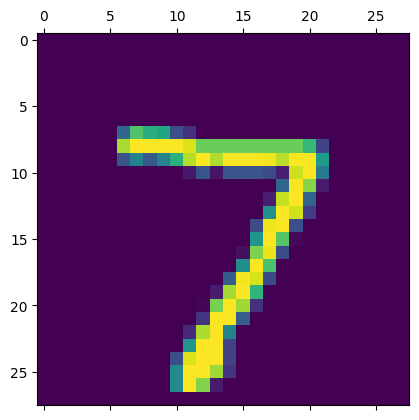

In [42]:
plt.matshow(X_test[0])
model.predict(X_test_flattened[0:1])

In [43]:
np.argmax(model.predict(X_test_flattened[0:1]))

1/1 [==============================] - 0s 21ms/step


7

In [50]:
tf.math.confusion_matrix(labels=y_test, predictions=[np.argmax(i) for i in (model.predict(X_test_flattened))])

313/313 [==============================] - 0s 749us/step


<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 967,    0,    2,    1,    0,    4,    4,    1,    1,    0],
       [   0, 1119,    2,    2,    0,    1,    4,    2,    5,    0],
       [   9,    9,  935,   13,    7,    3,   11,    9,   31,    5],
       [   4,    0,   22,  919,    0,   27,    2,   10,   18,    8],
       [   1,    1,    7,    2,  898,    0,   13,    4,    9,   47],
       [  12,    3,    6,   31,    6,  786,   12,    4,   26,    6],
       [  14,    3,    8,    1,    7,   13,  910,    1,    1,    0],
       [   3,    8,   25,    9,    6,    0,    0,  937,    2,   38],
       [  12,   12,    7,   26,    9,   33,    9,   10,  848,    8],
       [  11,    7,    1,   11,   16,    8,    0,   14,    4,  937]],
      dtype=int32)>

In [51]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [54]:
model = keras.Sequential(
    keras.layers.Dense(20, input_shape=(784,), activation='sigmoid')
)
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.fit(X_train_flattened, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 2s 917us/step - loss: 0.4752 - accuracy: 0.8765
Epoch 2/5
1875/1875 [==============================] - 2s 854us/step - loss: 0.3038 - accuracy: 0.9151
Epoch 3/5
1875/1875 [==============================] - 2s 826us/step - loss: 0.2830 - accuracy: 0.9204
Epoch 4/5
1875/1875 [==============================] - 2s 835us/step - loss: 0.2729 - accuracy: 0.9237
Epoch 5/5
1875/1875 [==============================] - 2s 851us/step - loss: 0.2664 - accuracy: 0.9262


In [55]:
tf.math.confusion_matrix(labels=y_test, predictions=[np.argmax(i) for i in (model.predict(X_test_flattened))])

313/313 [==============================] - 0s 677us/step


<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 962,    0,    1,    2,    0,    5,    7,    2,    1,    0],
       [   0, 1109,    3,    2,    0,    1,    4,    2,   14,    0],
       [   4,    8,  929,   17,    7,    5,   13,    8,   36,    5],
       [   4,    0,   20,  922,    0,   25,    2,    8,   18,   11],
       [   1,    1,    5,    1,  914,    0,   10,    2,    9,   39],
       [  10,    3,    3,   27,   11,  782,   16,    4,   28,    8],
       [  10,    3,    7,    1,    7,   10,  917,    2,    1,    0],
       [   1,    7,   24,   11,   10,    1,    0,  922,    2,   50],
       [   6,    7,    7,   23,    9,   28,    9,    5,  868,   12],
       [  11,    6,    1,   11,   23,    5,    0,    8,    5,  939]],
      dtype=int32)>

In [56]:
model.predict(X_test_flattened[0:1])

1/1 [==============================] - 0s 15ms/step


array([[4.3683730e-02, 4.7768100e-07, 1.0446809e-01, 9.7663254e-01,
        7.3870989e-03, 1.9545692e-01, 3.9761335e-06, 9.9986464e-01,
        2.1937850e-01, 8.2867974e-01, 6.8366709e-05, 4.8500522e-05,
        3.3350578e-05, 9.5093732e-05, 4.3259344e-05, 3.2088461e-05,
        4.5668603e-05, 6.3021034e-05, 7.2695271e-05, 1.4885295e-05]],
      dtype=float32)